<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW4/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# read csv
df  = pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW4/nutrition_subset.csv");
df

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [10]:
#checking how many ? is available in dataset 
print("agfood iteme: ",df['food item'].isin(['?']).sum())
print("weight_in_grams: ",df.weight_in_grams.isin(['?']).sum())
print("saturated_fat: ",df.saturated_fat.isin(['?']).sum())
print("cholesterol: ",df.cholesterol.isin(['?']).sum())


agfood iteme:  0
weight_in_grams:  0
saturated_fat:  0
cholesterol:  0


In [11]:
# check null values
df.isnull().sum()

food item          0
weight_in_grams    0
saturated_fat      0
cholesterol        0
dtype: int64

# 3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.

In [27]:
#sorting in descending order to get highest items at top 
df_fooditem5 = df.sort_values(by=['saturated_fat'],ascending=False).iloc[0:5]
df_fooditem5.reset_index(drop=True,inplace=True)
df_fooditem5

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram
0,CHEESECAKE 1 CAKE,1110.0,119.9,2053,0.108018,1.071922
1,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703,0.099579,0.944246
2,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609,0.083032,0.693904
3,CREME PIE 1 PIE,910.0,90.1,46,0.099011,0.935650
4,LARD 1 CUP,205.0,80.4,195,0.392195,5.371375


# 4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?

In [15]:
df['saturated_fat_per_gram']=df['saturated_fat']/df['weight_in_grams']
df

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,0.000000
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,0.000000
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,0.000000
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,0.000000


In [30]:
df.isnull().sum()

food item                        0
weight_in_grams                  0
saturated_fat                    0
cholesterol                      0
saturated_fat_per_gram           0
scaled_saturated_fat_per_gram    0
dtype: int64

In [16]:
#sorting in descending order to get highest items at top 
df_fooditem5_2 = df.sort_values(by=['saturated_fat_per_gram'],ascending=False).iloc[0:5]
df_fooditem5_2.reset_index(drop=True,inplace=True)
df_fooditem5_2

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
1,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
2,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
3,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
4,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


#5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram

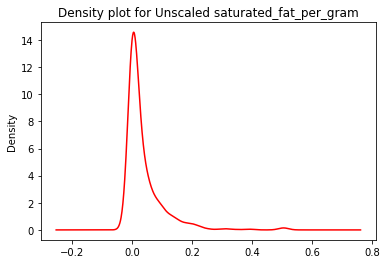

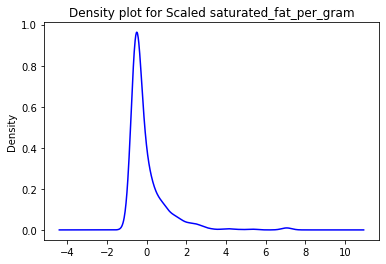

In [28]:
from scipy import stats
# Standardize (zero mean) and density plot for saturated_fat_per_gram
df['scaled_saturated_fat_per_gram'] = stats.zscore(df.saturated_fat_per_gram, nan_policy='omit')
df.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled saturated_fat_per_gram')
plt.show()

df.scaled_saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled saturated_fat_per_gram')
plt.show()

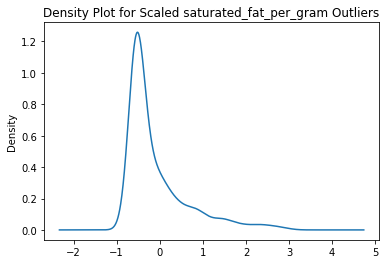

In [29]:
# Determine the outliers using the three sigma rule for the scaled_saturated_fat_per_gram attribute

df_scaled_saturated_fat_per_gram_outliers = df.query('~(scaled_saturated_fat_per_gram > 3 | scaled_saturated_fat_per_gram < -3)')['scaled_saturated_fat_per_gram']
df_scaled_saturated_fat_per_gram_outliers.plot.density()
plt.title('Density Plot for Scaled saturated_fat_per_gram Outliers')
plt.show()

In [ ]:
# Determine the outliers using the three sigma rule for the scaled_saturated_fat_per_gram attribute

nutrition_subsetDF_outliers = df.query('~(scaled_saturated_fat_per_gram > 3 | scaled_saturated_fat_per_gram < -3)')['scaled_saturated_fat_per_gram']

nutrition_subsetDF_outliers.plot.density()
plt.title('Density Plot for Scaled saturated_fat_per_gram Outliers')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


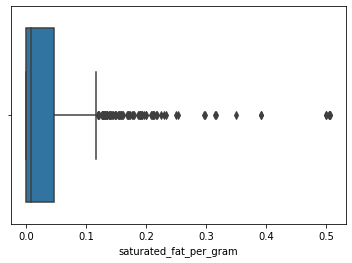

In [18]:
sns.boxplot(df['saturated_fat_per_gram'])

In [ ]:
# import library
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df.saturated_fat_per_gram = imputer.fit_transform(df['saturated_fat_per_gram'].values.reshape(-1,1))[:,0]



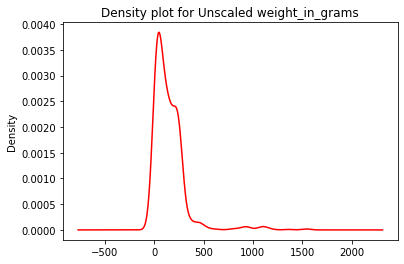

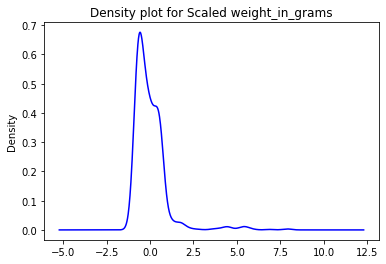

In [31]:
df['scaled_weight_in_grams'] = stats.zscore(df.weight_in_grams, nan_policy='omit')
df.weight_in_grams.plot.density(color="red")
plt.title('Density plot for Unscaled weight_in_grams')
plt.show()

df.scaled_weight_in_grams.plot.density(color="blue")
plt.title('Density plot for Scaled weight_in_grams')
plt.show()

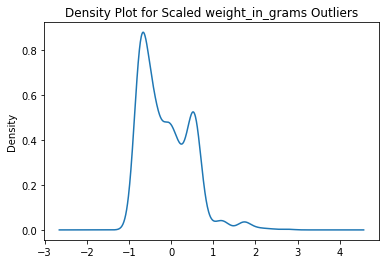

In [32]:
# Determine the outliers using the three sigma rule for the scaled_weight_in_grams attribute

df_scaled_weight_in_grams_outliers = df.query('~(scaled_weight_in_grams > 3 | scaled_weight_in_grams < -3)')['scaled_weight_in_grams']
df_scaled_weight_in_grams_outliers.plot.density()
plt.title('Density Plot for Scaled weight_in_grams Outliers')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


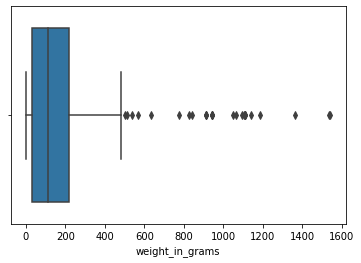

In [33]:
sns.boxplot(df['weight_in_grams'])

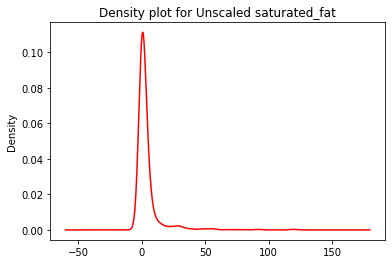

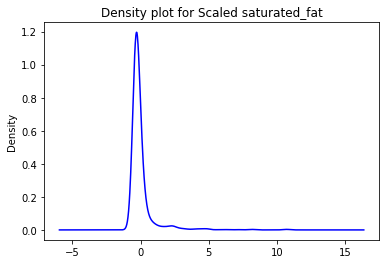

In [34]:
# Standardize (zero mean) of saturated_fat variable and density plot
df['scaled_saturated_fat'] = stats.zscore(df.saturated_fat, nan_policy='omit')
df.saturated_fat.plot.density(color="red")
plt.title('Density plot for Unscaled saturated_fat')
plt.show()

df.scaled_saturated_fat.plot.density(color="blue")
plt.title('Density plot for Scaled saturated_fat')
plt.show()

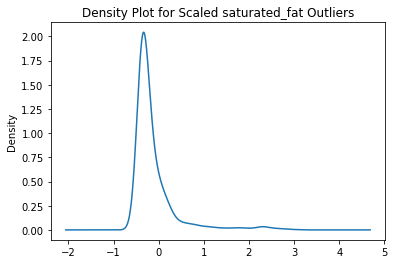

In [35]:
# Determine the outliers using the three sigma rule for the scaled_saturated_fat attribute

df_scaled_saturated_fat_outliers = df.query('~(scaled_saturated_fat > 3 | scaled_saturated_fat < -3)')['scaled_saturated_fat']

df_scaled_saturated_fat_outliers.plot.density()
plt.title('Density Plot for Scaled saturated_fat Outliers')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


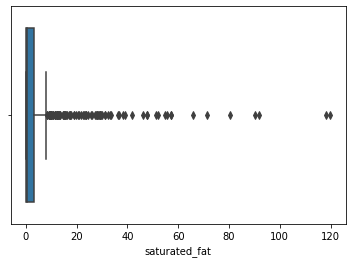

In [37]:
sns.boxplot(df['saturated_fat'])